## Statystyka i Analiza danych
# Laboratorium 3 - Rozkłady prawdopodobieństwa

### Ćwiczenie 1: Rozkład normalny

Zapoznaj się z funkcjami R dotyczącymi rozkładu normalnego:
```
dnorm
pnorm
qnorm
rnorm
```

In [1]:
?dnorm

Zaimplementuj funkcję gęstości rozkładu normalnego i porównaj wynik z funkcją `dnorm`

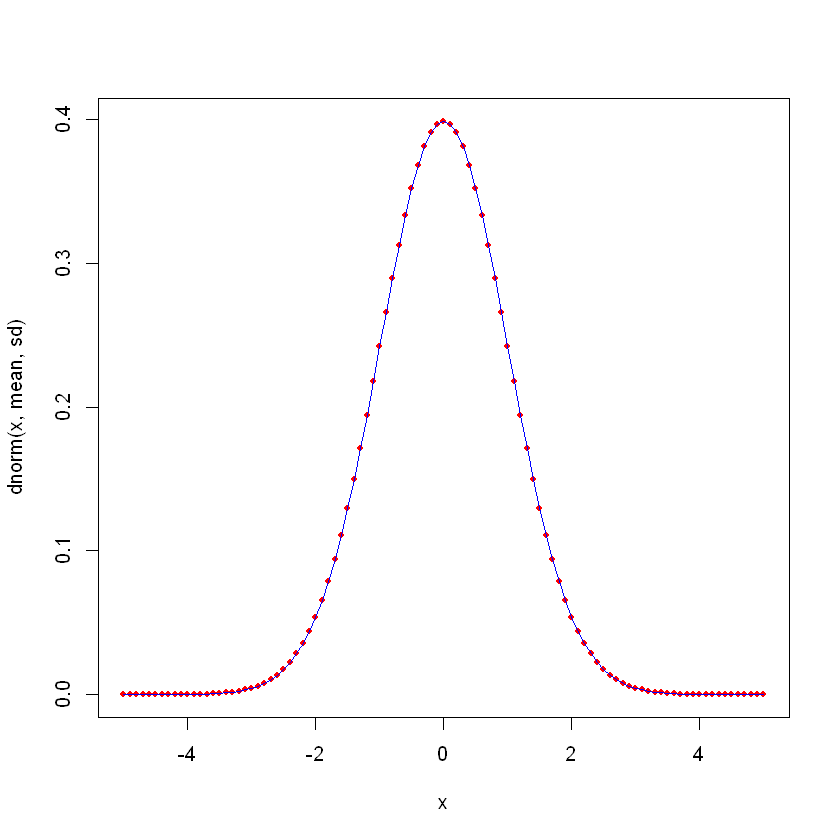

In [3]:
gestosc <- function(x, mean=0, sd=1) {
    gestosc <- (1/(sd * sqrt(2 * pi))) * exp(-((x-mean)^2)/(2*sd^2))
}


#### sprawdzenie wyniku w postaci wykresu ####
mean <- 0; sd <- 1
x <- -50:50/10   # x = -5, -4.9, ..., 4.9, 5
plot(x, dnorm(x, mean, sd), col="red", pch=20)  # wykres punktowy dnorm
lines(x, gestosc(x, mean, sd), col="blue") # dodaj wykres gestosci jako linię

Spróbuj numerycznie zcałkować gęstość rozkładu (metodą prostokątów) aby uzyskać wartość dystrybuanty, a następnie porównaj wynik z funkcją `pnorm`:

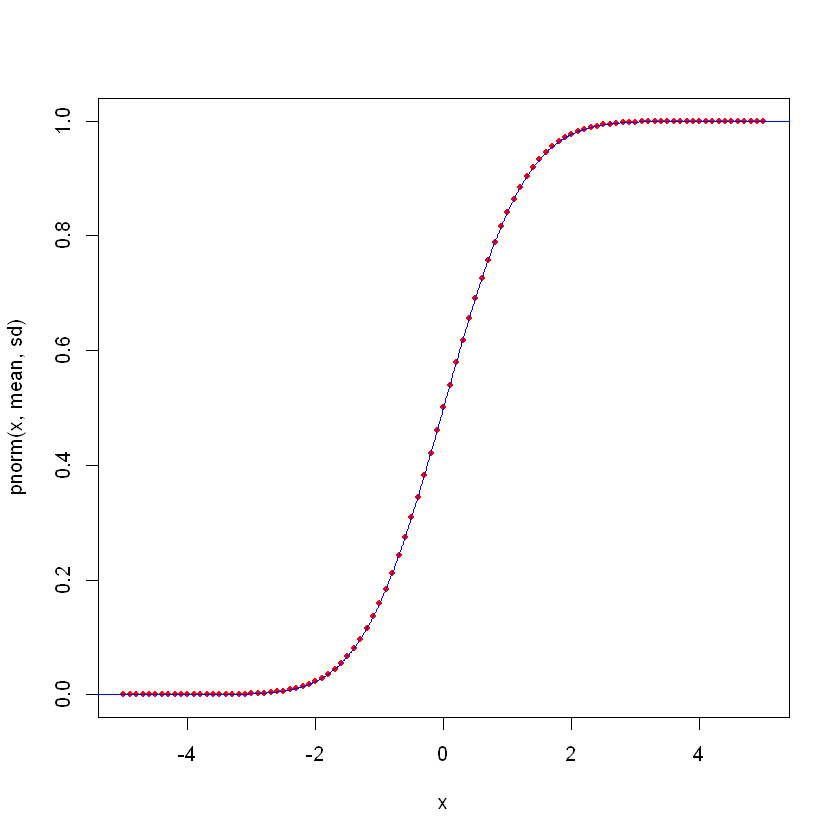

In [6]:
mean <- 0; sd <- 1

delta = 0.01
z <- -2000:2000*delta   # z od -20 do 20 co 0.01

# całkuj numerycznie funkcję gęstości; możesz użyć funkcji cumsum
dystrybuanta <- cumsum(delta * gestosc(z,mean,sd))


#### sprawdzenie wyniku w postaci wykresu ####
x <- -50:50/10
plot(x, pnorm(x, mean, sd), col="red", pch=20)  # wykres punktowy pnorm
lines(z, dystrybuanta, col="blue") # dodaj wykresu dystrybuanty jako linię

### Ćwiczenie 2: Wstęp do metody Monte Carlo

Metoda Monte Carlo, wymyślona przez Stanisława Ulama, służy do przybliżania wartości różnych całek (np. pola powierzchni figury, pola pod wykresem funkcji/rozkładu) poprzez wielokrotne losowanie liczb z odpowiedniego rozkładu prawdopodobieństwa.

Zaczniemy od próby oszacowania metodą Monte Carlo pola powierzchni koła o promieniu 1, wpisanego w kwadrat o bokach [-1,1]. W tym utwórz funkcję, która losuje n par liczb x i y z rozkładu jednostajnego na odcinku [-1,1], a następnie zlicza, jaka część z nich trafiła w koło i na postawie tego szacuje pole koła.

In [13]:
poleMC <- function(n) {
    x <- runif(n, min=-1, max=1)
    y <- runif(n, min=-1, max=1)

   4 * mean((x^2 + y^2) <= 1)
}


Porównaj wyniki funkcji `poleMC` z wartością pola figury obliczonej za pomocą wzoru dla różnych wartości `n`

In [37]:
kolo <- pi
kolo
poleMC(1000)
poleMC(10000)
poleMC(100000)
poleMC(1000000)

[1] 3.141593

[1] 3.228

[1] 3.1448

[1] 3.13256

[1] 3.141556

### Ćwiczenie 3: Metoda Monte Carlo dla rozkładu normalnego

Rozpoczniemy od napisania funkcji, która generuje liczby losowe z rozkładu normalnego mając do dyspozycji tylko funkcję `runif` (do losowania z rozkładu jednostajnego). Możesz użyć funkcji `qnorm`.

In [38]:
losowe <- function(n, mean=0, sd=1) {
    x <- runif(n)
    qnorm(x,mean,sd)
}

Następnie przetestujemy funkcję poprzez utworzenie histogramu wylosowanych wartości i porównanie z prawdziwą gęstością rozkładu oraz funkcją R `rnorm`.

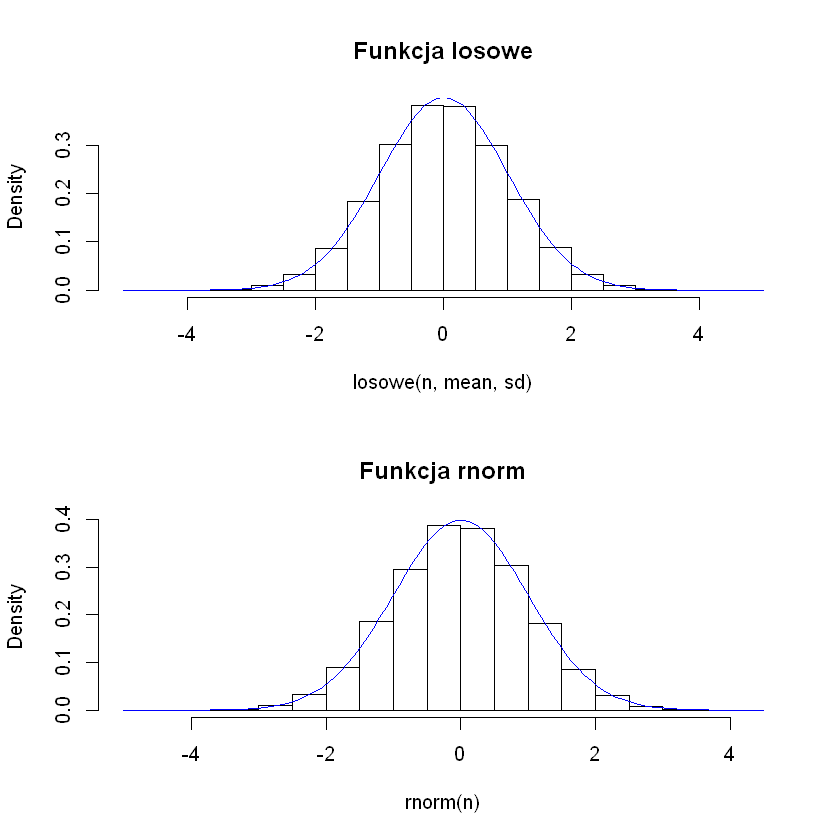

In [39]:
mean <- 0; sd <- 1
n <- 100000

par(mfrow=c(2,1)) 

hist(losowe(n, mean, sd), prob=TRUE, main="Funkcja losowe")
curve(dnorm(x, mean, sd), add=TRUE, col="blue")

hist(rnorm(n), prob=TRUE, main="Funkcja rnorm")
curve(dnorm(x, mean, sd), add=TRUE, col="blue")

Napiszemy teraz funkcję szacującą wartość dystrybuanty rozkładu normalnego metodą Monte Carlo:

In [43]:
dystrybuantaMC <- function(x, mean=0, sd=1, n=10000) {
    mean(rnorm(n,mean,sd) <= x)
}


Porównaj wartości funkcji `dystrybuantaMC` z wartościami zwracanymi przez funkcję `pnorm` dla kilku wartości x

In [45]:
x <- 0.5
dystrybuantaMC(x, n=100000)
pnorm(x)
x <- 0.25
dystrybuantaMC(x, n=100000)
pnorm(x)
x <- 0.75
dystrybuantaMC(x, n=100000)
pnorm(x)
x <- 0.3
dystrybuantaMC(x, n=100000)
pnorm(x)

[1] 0.69317

[1] 0.6914625

[1] 0.59895

[1] 0.5987063

[1] 0.77464

[1] 0.7733726

[1] 0.61885

[1] 0.6179114

### Ćwiczenie 4: Centralne Twierdzenie Graniczne

W celu pogłębienia intuicji dotyczącej Centralnego Twierdzenia Granicznego (CTW), będziemy badać jak zmienia się rozkład sum zmiennych losowych o rozkładzie:

  - dwupunktowym z parametrem *p=0.5*,
  - jednostajnym na [0,1],
  - normalnym (funkcja `rnorm`).
  
W tym celu należy utworzyć funkcje, które zwracają `N` losowych sum, każda składająca się z `n` elementów. Można to zrobić poprzez utworzenie losowej macierzy `N` na `n`, a następnie zsumowanie wierszy (funkcja `rowSums').

In [51]:
sumyDwupunktowy <- function(n, N=100000) {
    rowSums(matrix(rbinom(n*N, 1, 0.5), N, n)) 
}

sumyJednostajny <- function(n, N=100000) {
    rowSums(matrix(runif(n*N), N, n)) 
}

sumyNormalny <- function(n, N=100000) {
    rowSums(matrix(rnorm(n*N), N, n))
}

Utwórz wykresy słupkowe dla sum zmiennych o rozkładzie dwupunktowym, dla *n = 5, 10, 20, 50*:

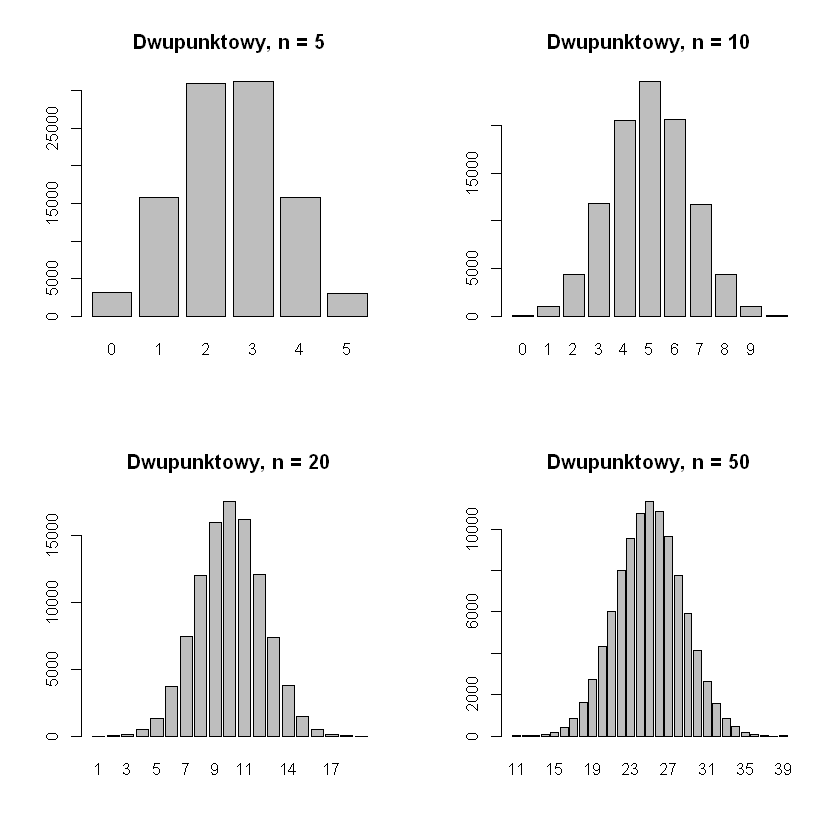

In [52]:
par(mfrow=c(2,2))
for (n in c(5, 10, 20, 50)) {
    barplot(table(sumyDwupunktowy(n)), main=paste("Dwupunktowy, n =", n))
}

Podobnie, utwórz histogramy dla sum losowych z rozkładu jednostajnego dla *n = 1, 2, 3, 5, 10, 50*. Można dodać krzywą gęstości rozkładu normalnego za pomocą komendy `curve` (**uwaga**: trzeba odpowiednio dobrać wartość oczekiwaną i wariancję!).

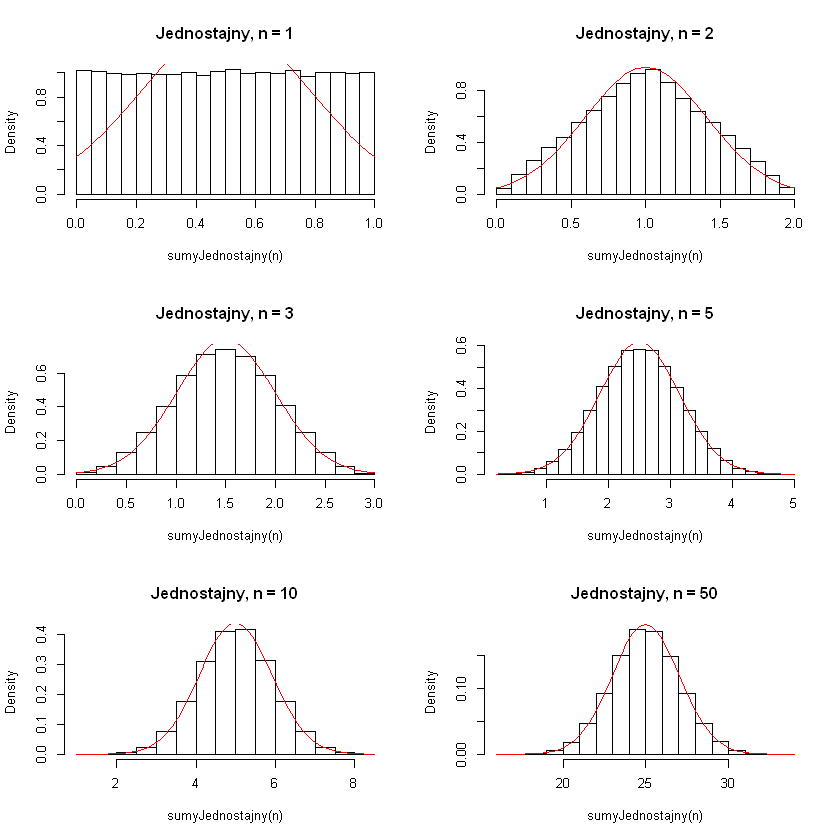

In [56]:
par(mfrow=c(3,2))
for (n in c(1, 2, 3, 5, 10, 50)) {
    hist(sumyJednostajny(n), prob=TRUE, main=paste("Jednostajny, n =", n))
    curve(dnorm(x,(0 + n)/2,sqrt((0 + n)/12)), add=TRUE, col="red")
}

Na koniec, utwórz podobne wykresy dla zmiennych o rozkładzie normalnym.

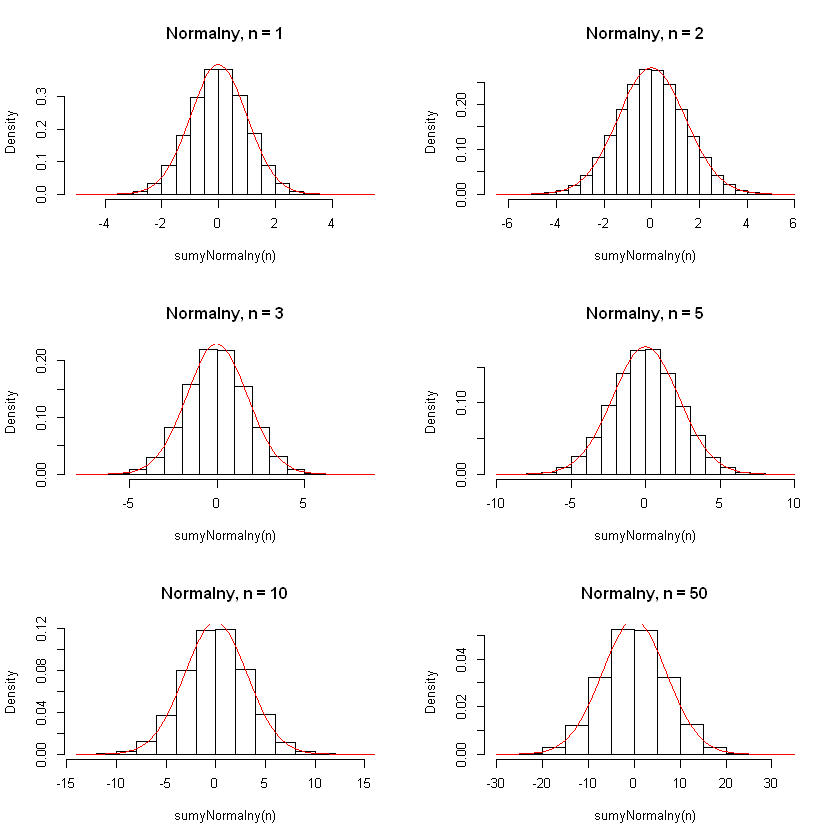

In [57]:
par(mfrow=c(3,2))
for (n in c(1, 2, 3, 5, 10, 50)) {
    hist(sumyNormalny(n), prob=TRUE, main=paste("Normalny, n =", n))
    curve(dnorm(x, 0 ,sqrt(n)), add=TRUE, col="red")
}